<a href="https://colab.research.google.com/github/kusuraj-08/SHALA2020/blob/master/covid'19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.api import Holt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
covid=pd.read_csv("covid_19_data.csv")
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [3]:
print("Size/shape of the dataset",covid.shape)
print("Checking for null values",covid.isnull().sum())
print("Checking data-type",covid.dtypes)

Size/shape of the dataset (18327, 8)
Checking for null values SNo                   0
ObservationDate       0
Province/State     9277
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64
Checking data-type SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


In [0]:
covid.drop(["SNo"],1,inplace=True)

In [5]:
covid.isnull().sum()

ObservationDate       0
Province/State     9277
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [0]:
covid["ObservationDate"]=pd.to_datetime(covid["ObservationDate"])

In [7]:
covid["ObservationDate"]

0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
18322   2020-04-24
18323   2020-04-24
18324   2020-04-24
18325   2020-04-24
18326   2020-04-24
Name: ObservationDate, Length: 18327, dtype: datetime64[ns]

In [8]:
#Grouping different types of cases as per the date
datawise=covid.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datawise

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-01-22,555.0,28.0,17.0
2020-01-23,653.0,30.0,18.0
2020-01-24,941.0,36.0,26.0
2020-01-25,1438.0,39.0,42.0
2020-01-26,2118.0,52.0,56.0
...,...,...,...
2020-04-20,2472259.0,645738.0,169986.0
2020-04-21,2549123.0,679819.0,176583.0
2020-04-22,2623960.0,709694.0,183066.0


In [9]:
print("Basic Information")
print("Total number of confirmed cases around the world",datawise["Confirmed"].iloc[-1])
print("Total number of Recovered cases around the world",datawise["Recovered"].iloc[-1])
print("Total number of Death cases around the world",datawise["Deaths"].iloc[-1])
print("Total no. of active cases around the world",(datawise['Confirmed'].iloc[-1]-datawise['Recovered'].iloc[-1]-datawise["Deaths"].iloc[-1]))
print("Total no. of closed cases around the world",(datawise['Recovered'].iloc[-1]+datawise["Deaths"].iloc[-1]))

Basic Information
Total number of confirmed cases around the world 2811193.0
Total number of Recovered cases around the world 793601.0
Total number of Death cases around the world 197159.0
Total no. of active cases around the world 1820433.0
Total no. of closed cases around the world 990760.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text major ticklabel objects>)

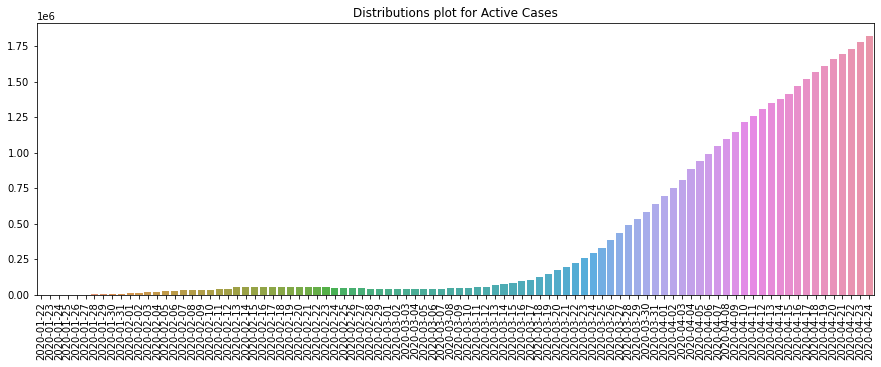

In [10]:
plt.figure(figsize=(15,5))
sns.barplot(x=datawise.index.date, y=datawise['Confirmed']-datawise['Recovered']-datawise["Deaths"])
plt.title("Distributions plot for Active Cases")
plt.xticks(rotation=90)

Text(0, 0.5, 'Weakly Progress of different types of cases')

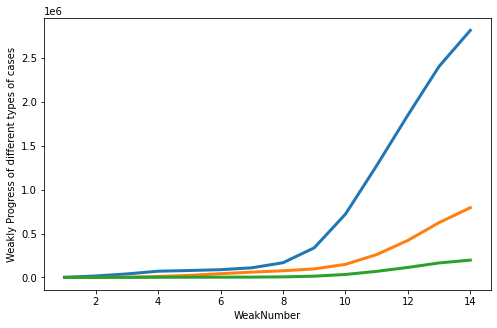

In [11]:
datawise['WeekofYear']=datawise.index.weekofyear
weak_num=[]
weakwise_confirmed=[]
weakwise_recovered=[]
weakwise_deaths=[]
w=1
for i in list(datawise["WeekofYear"].unique()):
  weakwise_confirmed.append(datawise[datawise["WeekofYear"]==i]["Confirmed"].iloc[-1])
  weakwise_recovered.append(datawise[datawise["WeekofYear"]==i]["Recovered"].iloc[-1])
  weakwise_deaths.append(datawise[datawise["WeekofYear"]==i]["Deaths"].iloc[-1])
  weak_num.append(w)
  w=w+1
plt.figure(figsize=(8,5))
plt.plot(weak_num,weakwise_confirmed,linewidth=3) 
plt.plot(weak_num,weakwise_recovered,linewidth=3) 
plt.plot(weak_num,weakwise_deaths,linewidth=3)  
plt.xlabel("WeakNumber")
plt.ylabel("Weakly Progress of different types of cases")

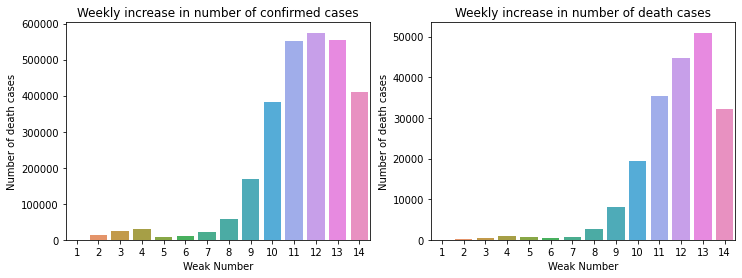

In [12]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,4))
sns.barplot(x=weak_num,y=pd.Series(weakwise_confirmed).diff().fillna(0),ax=ax1)
#sns.barplot(x=weak_num,y=pd.Series(weakwise_recovered).diff().fillna(0),ax=ax1)
sns.barplot(x=weak_num,y=pd.Series(weakwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Weak Number")
ax2.set_xlabel("Weak Number")
ax1.set_ylabel("Number of death cases")
ax2.set_ylabel("Number of death cases")
ax1.set_title("Weekly increase in number of confirmed cases")
ax2.set_title("Weekly increase in number of death cases")
plt.show()


Average increase in number of Confirmed cases everyday: 29900.0
Average increase in number of Recovered cases everyday: 8442.0
Average increase in number of Deaths cases everyday: 2097.0


(array([737456., 737470., 737485., 737499., 737516., 737530.]),
 <a list of 6 Text major ticklabel objects>)

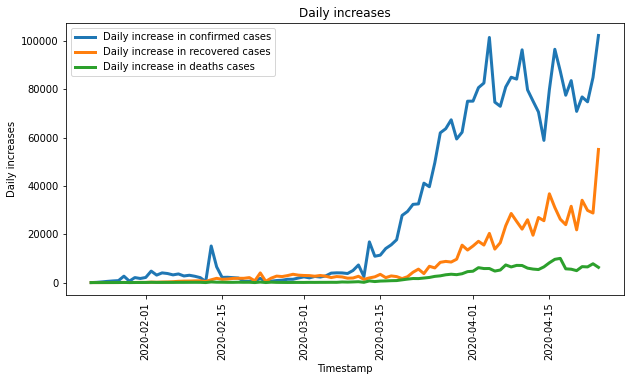

In [13]:
print("Average increase in number of Confirmed cases everyday:",np.round(datawise["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of Recovered cases everyday:",np.round(datawise["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of Deaths cases everyday:",np.round(datawise["Deaths"].diff().fillna(0).mean()))
plt.figure(figsize=(10,5))
plt.plot(datawise["Confirmed"].diff().fillna(0),label="Daily increase in confirmed cases",linewidth=3)
plt.plot(datawise["Recovered"].diff().fillna(0),label="Daily increase in recovered cases",linewidth=3)
plt.plot(datawise["Deaths"].diff().fillna(0),label="Daily increase in deaths cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily increases")
plt.title("Daily increases")
plt.legend()
plt.xticks(rotation=90)

In [0]:
#country wise analysis
#Calculating Country wise Mortality rate
countrywise=covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Confirmed"])*100
countrywise["Mortality"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100

Text(0.5, 1.0, 'Top 15 countires as per number of deaths cases')

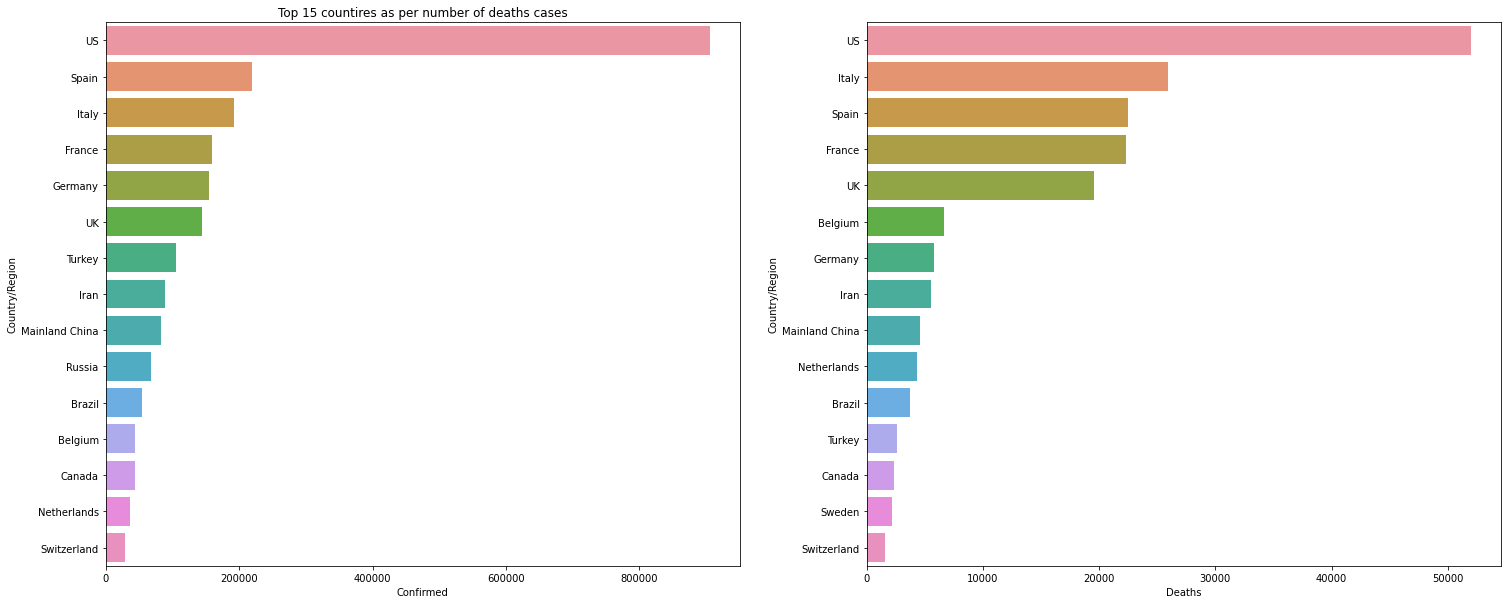

In [15]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(25,10))
top_15confirmed=countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15deaths=countrywise.sort_values(["Deaths"],ascending=False).head(15)
sns.barplot(x=top_15confirmed["Confirmed"],y=top_15confirmed.index,ax=ax1)
ax1.set_title("Top 15 countires as per number of confirmed cases")
sns.barplot(x=top_15deaths["Deaths"],y=top_15deaths.index,ax=ax2)
ax1.set_title("Top 15 countires as per number of deaths cases")

In [16]:
#Data Analaysis for India
india_data= covid[covid["Country/Region"]=="India"]
datawise_india=india_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print(datawise_india.iloc[-1])
print("Total Active Cases",datawise_india["Confirmed"].iloc[-1]-datawise_india["Recovered"].iloc[-1]-datawise_india["Deaths"].iloc[-1])
print("Total Closed cases",datawise_india["Recovered"].iloc[-1]+datawise_india["Deaths"].iloc[-1])

Confirmed    24530.0
Recovered     5498.0
Deaths         780.0
Name: 2020-04-24 00:00:00, dtype: float64
Total Active Cases 18252.0
Total Closed cases 6278.0


In [17]:
#Data Analaysis for US
Us_data= covid[covid["Country/Region"]=="US"]
datawise_us=Us_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print(datawise_us.iloc[-1])
print("Total Active Cases",datawise_us["Confirmed"].iloc[-1]-datawise_us["Recovered"].iloc[-1]-datawise_us["Deaths"].iloc[-1])
print("Total Closed cases",datawise_us["Recovered"].iloc[-1]+datawise_us["Deaths"].iloc[-1])

Confirmed    905333.0
Recovered     99079.0
Deaths        51949.0
Name: 2020-04-24 00:00:00, dtype: float64
Total Active Cases 754305.0
Total Closed cases 151028.0


No handles with labels found to put in legend.


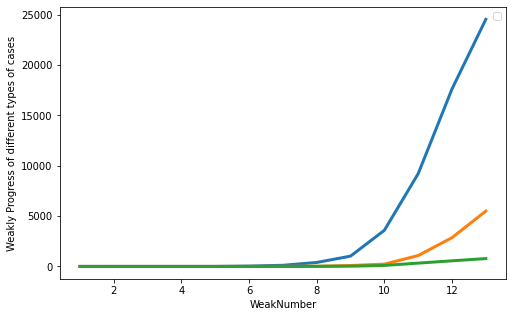

In [18]:
datawise_india['WeekofYear']=datawise_india.index.weekofyear
weak_num_india=[]
weakwise_confirmed=[]
weakwise_recovered=[]
weakwise_deaths=[]
w=1
for i in list(datawise_india["WeekofYear"].unique()):
  weakwise_confirmed.append(datawise_india[datawise_india["WeekofYear"]==i]["Confirmed"].iloc[-1])
  weakwise_recovered.append(datawise_india[datawise_india["WeekofYear"]==i]["Recovered"].iloc[-1])
  weakwise_deaths.append(datawise_india[datawise_india["WeekofYear"]==i]["Deaths"].iloc[-1])
  weak_num_india.append(w)
  w=w+1
plt.figure(figsize=(8,5))
plt.plot(weak_num_india,weakwise_confirmed,linewidth=3) 
plt.plot(weak_num_india,weakwise_recovered,linewidth=3) 
plt.plot(weak_num_india,weakwise_deaths,linewidth=3)  
plt.xlabel("WeakNumber")
plt.ylabel("Weakly Progress of different types of cases")
plt.legend()

In [19]:
max_india= datawise_india["Confirmed"].max()
china_data= covid[covid["Country/Region"]=="Mainland China"]
Italy_data=covid[covid["Country/Region"]=="Italy"]
US_data=covid[covid["Country/Region"]=="US"]
spain_data=covid[covid["Country/Region"]=="Spain"]
datawise_china=china_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datawise_italy=Italy_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datawise_us=US_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datawise_spain=spain_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print("It took",datawise_india[datawise_india["Confirmed"]>0].shape[0],"days in India to reach",max_india,"Confirmed Cases")
print("It took",datawise_italy[(datawise_italy["Confirmed"]>0) & (datawise_italy["Confirmed"]<=max_india)].shape[0],"days in italy to reach of Confirmed Cases")
print("It took",datawise_us[(datawise_us["Confirmed"]>0) & (datawise_us["Confirmed"]<=max_india)].shape[0],"days in US to reach of Confirmed Cases")
print("It took",datawise_china[(datawise_china["Confirmed"]>0) & (datawise_china["Confirmed"]<=max_india)].shape[0],"days in china to reach of Confirmed Cases")
print("It took",datawise_spain[(datawise_spain["Confirmed"]>0) & (datawise_spain["Confirmed"]<=max_india)].shape[0],"days in spain to reach of Confirmed Cases")

It took 86 days in India to reach 24530.0 Confirmed Cases
It took 44 days in italy to reach of Confirmed Cases
It took 59 days in US to reach of Confirmed Cases
It took 14 days in china to reach of Confirmed Cases
It took 49 days in spain to reach of Confirmed Cases


In [0]:
datawise["Days Since"]=datawise.index-datawise.index[0]
datawise["Days Since"]=datawise["Days Since"].dt.days
train_m1=datawise.iloc[:int(datawise.shape[0]*0.95)]
valid_m1= datawise.iloc[:int(datawise.shape[0]*0.95):]
model_scores=[]


In [21]:
lin_reg= LinearRegression(normalize=True)
svm=SVR(C=1,degree=5,kernel='poly',epsilon=0.001)
lin_reg.fit(np.array(train_m1["Days Since"]).reshape(-1,1),np.array(train_m1["Confirmed"]).reshape(-1,1))
svm.fit(np.array(train_m1["Days Since"]).reshape(-1,1),np.array(train_m1["Confirmed"]).reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1, cache_size=200, coef0=0.0, degree=5, epsilon=0.001, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
prediction_vaild_lin_reg=lin_reg.predict(np.array(valid_m1["Days Since"]).reshape(-1,1))
prediction_valid_svm= svm.predict(np.array(valid_m1["Days Since"]).reshape(-1,1))

In [23]:
new_date=[]
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(1,18):
  new_date.append(datawise.index[-1]+timedelta(days=i))
  new_prediction_lr.append(lin_reg.predict(np.array(datawise["Days Since"].max()+i).reshape(-1,1))[0][0])
  new_prediction_svm.append(svm.predict(np.array(datawise["Days Since"].max()+i).reshape(-1,1))[0])
pd.set_option("display.float_format",lambda x: '%.f'%x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns= ["Date","LR","SVM"]) 
model_predictions.head(15)


,Date,LR,SVM
0,2020-04-25,1560529,3322586
1,2020-04-26,1582219,3500761
2,2020-04-27,1603909,3686599
3,2020-04-28,1625599,3880344
4,2020-04-29,1647289,4082245
5,2020-04-30,1668980,4292557
6,2020-05-01,1690670,4511540
7,2020-05-02,1712360,4739461
8,2020-05-03,1734050,4976588
9,2020-05-04,1755740,5223200


In [0]:
model_train=datawise.iloc[:int(datawise.shape[0]*0.85)]
valid= datawise.iloc[int(datawise.shape[0]*0.85):]

In [0]:
holt=Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=1.4,smoothing_slope=0.2)
y_pred= valid.copy()
y_pred["Holt"]=holt.forecast(len(valid))

In [28]:
holt_new_date=[]
holt_new_prediction=[]
for i in range(1,18):
  holt_new_date.append(datawise.index[-1]+timedelta(days=i))
  holt_new_prediction.append(holt.forecast((len(valid)+i))[-1])
model_predictions["Holts Linear Model Prediction"]=holt_new_prediction
model_predictions.head(15)  

,Date,LR,SVM,Holts Linear Model Prediction
0,2020-04-25,1560529,3322586,2855246
1,2020-04-26,1582219,3500761,2933902
2,2020-04-27,1603909,3686599,3012558
3,2020-04-28,1625599,3880344,3091214
4,2020-04-29,1647289,4082245,3169870
5,2020-04-30,1668980,4292557,3248526
6,2020-05-01,1690670,4511540,3327182
7,2020-05-02,1712360,4739461,3405838
8,2020-05-03,1734050,4976588,3484494
9,2020-05-04,1755740,5223200,3563150


In [0]:
                                                                    #  !!!!!!!!!!Thank You!!!!!!!!!